In [1]:
import numpy as np
from scipy.stats import norm, t

In [2]:
np.random.seed(1)

In [3]:
N=1000
mu=5
sigma=2
X = np.random.randn(N)*sigma + mu

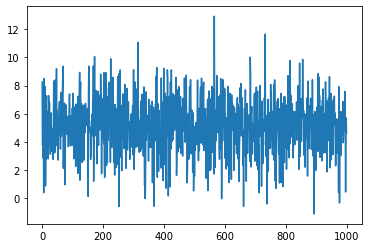

In [4]:
import matplotlib.pyplot as plt
plt.plot(X)

In [6]:
# Z-confidence interval
mu_hat = np.mean(X)
sigma_hat = np.std(X, ddof=1)
z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)
lower = mu_hat + z_left*sigma_hat / np.sqrt(N)
upper = mu_hat + z_right*sigma_hat /np.sqrt(N)
print(mu_hat, lower, upper)


5.077624952319204 4.955959806754385 5.199290097884023


In [8]:
# t-confidence interval
mu_hat = np.mean(X)
sigma_hat = np.std(X, ddof=1)
t_left = t.ppf(0.025, df=N-1)
t_right = t.ppf(0.975, df=N-1)
lower = mu_hat + t_left*sigma_hat / np.sqrt(N)
upper = mu_hat + t_right*sigma_hat /np.sqrt(N)
print(mu_hat, lower, upper)


5.077624952319204 4.9558122244324165 5.199437680205992


In [11]:
# Interpretation of confidence interval
# If we do this experiment many times, then for the 95% CI
# should contain the true value 95% of the time

def experiment():
    X = np.random.randn(N)*sigma + mu
    mu_hat = np.mean(X)
    sigma_hat = np.std(X, ddof=1)
    t_left = t.ppf(0.025, df=N-1)
    t_right = t.ppf(0.975, df=N-1)
    lower = mu_hat + t_left*sigma_hat / np.sqrt(N)
    upper = mu_hat + t_right*sigma_hat /np.sqrt(N)
    return mu > lower and mu < upper

def multi_experiment(M):
    results = [experiment() for _ in range(M)]
    return np.mean(results)

multi_experiment(10000)




0.9511